# Problem Statement:
# Determination of finding whether the Order placed by the Customer in McDonald Store is giving sufficient amount of High Energy( Excess of Calories) or Low Energy (Shortage of Calories).

# Determination of Hypothesis 
# Null Hypothesis:  H0:μ=μ0 where atleast one order made by the customer should be giving enough Calories from the order placed.
# Alternative Hypothesis: H1 : μ > μ0 if not more than one order by the customer should be giving enough Calories.  

In [188]:
#importing essential libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib as pt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
from numpy import array
from sklearn.metrics import accuracy_score  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [189]:
#Read in data
df = pd.read_csv('India_Menu_latest.csv')

df.head()

,MenuCategory,MenuItems,PerServeSize,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200
0,Regular Menu,McVeggie™ Burger,168.0,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1,Excess
1,Regular Menu,McAloo Tikki Burger®,146.0,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,0,Excess
2,Regular Menu,McSpicy™ Paneer Burger,199.0,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1,Excess
3,Regular Menu,Spicy Paneer Wrap,250.0,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1,Excess
4,Regular Menu,American Veg Burger,177.0,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1,Excess


In [190]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MenuCategory            141 non-null    object 
 1   MenuItems               141 non-null    object 
 2   PerServeSize            141 non-null    float64
 3   Protein                 141 non-null    float64
 4   Totalfat                141 non-null    float64
 5   SatFat                  141 non-null    float64
 6   Transfat                141 non-null    float64
 7   Cholesterols            141 non-null    float64
 8   Totalcarbohydrate       141 non-null    float64
 9   TotalSugars             141 non-null    float64
 10  AddedSugars             141 non-null    float64
 11  Sodium                  140 non-null    float64
 12  Energy                  141 non-null    int64  
 13  GotEnoughcalories >200  141 non-null    object 
dtypes: float64(10), int64(1), object(3)
memory

In [191]:
df.shape

(141, 14)

In [192]:
## Seperate Categorical & Numerical Columns
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['MenuCategory', 'MenuItems', 'GotEnoughcalories >200']
['PerServeSize', 'Protein', 'Totalfat', 'SatFat', 'Transfat', 'Cholesterols', 'Totalcarbohydrate', 'TotalSugars', 'AddedSugars', 'Sodium', 'Energy']


In [193]:
## Missing values for Numerical Columns
df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull()
                                                       .sum()>0]

Sodium    1
dtype: int64

In [194]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(9,inplace=True)

In [195]:
## Missing values for Numerical Columns
df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull()
                                                       .sum()>0]

Series([], dtype: int64)

In [196]:
## Missing values for Categorical Columns
round(100*(df[cat].isnull().sum()/len(df[cat].index)),2)

MenuCategory              0.0
MenuItems                 0.0
GotEnoughcalories >200    0.0
dtype: float64

## 2.1 **Replace ['Excess', 'Shortage'] string values to [1, 0]** using LabelEncoder

In [197]:
#replacing gas as "0" and disel as"1"
df.loc[ df['GotEnoughcalories >200'] == "Excess",'GotEnoughcalories >200'] = "1"
df.loc[ df['GotEnoughcalories >200'] == "Shortage", 'GotEnoughcalories >200'] = "0"
df.dropna()
df.head()

,MenuCategory,MenuItems,PerServeSize,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200
0,Regular Menu,McVeggie™ Burger,168.0,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1,1
1,Regular Menu,McAloo Tikki Burger®,146.0,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,0,1
2,Regular Menu,McSpicy™ Paneer Burger,199.0,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1,1
3,Regular Menu,Spicy Paneer Wrap,250.0,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1,1
4,Regular Menu,American Veg Burger,177.0,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1,1


In [198]:
#info coverting to numeric
df['GotEnoughcalories >200']=pd.to_numeric(df['GotEnoughcalories >200'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MenuCategory            141 non-null    object 
 1   MenuItems               141 non-null    object 
 2   PerServeSize            141 non-null    float64
 3   Protein                 141 non-null    float64
 4   Totalfat                141 non-null    float64
 5   SatFat                  141 non-null    float64
 6   Transfat                141 non-null    float64
 7   Cholesterols            141 non-null    float64
 8   Totalcarbohydrate       141 non-null    float64
 9   TotalSugars             141 non-null    float64
 10  AddedSugars             141 non-null    float64
 11  Sodium                  141 non-null    float64
 12  Energy                  141 non-null    int64  
 13  GotEnoughcalories >200  141 non-null    int64  
dtypes: float64(10), int64(2), object(2)
memory

In [199]:
df.head()

,MenuCategory,MenuItems,PerServeSize,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200
0,Regular Menu,McVeggie™ Burger,168.0,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1,1
1,Regular Menu,McAloo Tikki Burger®,146.0,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,0,1
2,Regular Menu,McSpicy™ Paneer Burger,199.0,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1,1
3,Regular Menu,Spicy Paneer Wrap,250.0,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1,1
4,Regular Menu,American Veg Burger,177.0,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1,1


In [200]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['MenuItems'])
 
# printing label
label

array([ 82,  76,  80, 127,  10, 139,  49, 107,  75,  42,  74, 125,  25,
         6,  24,  50,  73,  72,  47,  77,   2,   4,   5,   0,   1,   3,
       111,  86,  62, 116,  92,  65,  58,  59,  34, 137, 140,  33, 126,
       117, 118,  36,  52,  51,  40,  41,  13,  12,  11,  18,  17,  16,
        68,  67,  66,  46,  45,  44,  98,  97,  96,  15,  55,  54,  53,
       108,  35,  39,  38,  37, 102, 101, 100, 131, 130, 129,  69, 132,
        48,  57,  32,  99,  27, 133,  28,  70,  94, 109,  93, 135,  56,
         7, 124,  81, 114,  88, 115,  89, 113,  87, 110,  83, 121, 112,
         8,   9,  19,  23,  29,  78,  79, 105, 106,  21,  22, 119,  84,
        60, 120,  85,  61, 123,  91,  64, 122,  90,  63,  30,  43, 128,
        31, 138, 103,  14,  26, 104, 136,  71,  20, 134,  95])

In [201]:
df.drop("MenuItems", axis=1, inplace=True)
 
# Appending the array to our dataFrame
df["MenuItems"] = label
# printing Dataframe
df

,MenuCategory,PerServeSize,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200,MenuItems
0,Regular Menu,168.0,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1,1,82
1,Regular Menu,146.0,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,0,1,76
2,Regular Menu,199.0,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1,1,80
3,Regular Menu,250.0,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1,1,127
4,Regular Menu,177.0,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Condiments Menu,8.0,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05,0,0,136
137,Condiments Menu,30.0,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00,0,0,71
138,Condiments Menu,14.0,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95,0,0,20
139,Condiments Menu,40.0,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04,0,0,134


In [202]:
le1 = LabelEncoder()
label2 = le1.fit_transform(df['MenuCategory'])
 
# printing label
label2

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [203]:
df.drop("MenuCategory", axis=1, inplace=True)
 
# Appending the array to our dataFrame
df["MenuCategory"] = label2
# printing Dataframe
df

,PerServeSize,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200,MenuItems,MenuCategory
0,168.0,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1,1,82,6
1,146.0,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,0,1,76,6
2,199.0,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1,1,80,6
3,250.0,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1,1,127,6
4,177.0,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1,1,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,8.0,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05,0,0,136,2
137,30.0,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00,0,0,71,2
138,14.0,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95,0,0,20,2
139,40.0,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04,0,0,134,2


In [204]:
df.shape

(141, 14)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PerServeSize            141 non-null    float64
 1   Protein                 141 non-null    float64
 2   Totalfat                141 non-null    float64
 3   SatFat                  141 non-null    float64
 4   Transfat                141 non-null    float64
 5   Cholesterols            141 non-null    float64
 6   Totalcarbohydrate       141 non-null    float64
 7   TotalSugars             141 non-null    float64
 8   AddedSugars             141 non-null    float64
 9   Sodium                  141 non-null    float64
 10  Energy                  141 non-null    int64  
 11  GotEnoughcalories >200  141 non-null    int64  
 12  MenuItems               141 non-null    int64  
 13  MenuCategory            141 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 15.

In [206]:
df.isnull().sum()

PerServeSize              0
Protein                   0
Totalfat                  0
SatFat                    0
Transfat                  0
Cholesterols              0
Totalcarbohydrate         0
TotalSugars               0
AddedSugars               0
Sodium                    0
Energy                    0
GotEnoughcalories >200    0
MenuItems                 0
MenuCategory              0
dtype: int64

# EDA ON df2

In [207]:

#PROVIDING DESCRIPTIONS OF YOUR SAMPLE AND FEATURES

df.describe()

,PerServeSize,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200,MenuItems,MenuCategory
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,222.170213,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,359.560142,0.177305,0.546099,70.000000,3.929078
std,124.661685,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,472.404247,0.383288,0.499645,40.847277,2.136905
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.790000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,41.990000,0.000000,0.000000,35.000000,2.000000
50%,212.500000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,150.900000,0.000000,1.000000,70.000000,5.000000
75%,301.000000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,530.540000,0.000000,1.000000,105.000000,6.000000
max,544.000000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000,1.000000,1.000000,140.000000,6.000000


In [208]:
df.shape

(141, 14)

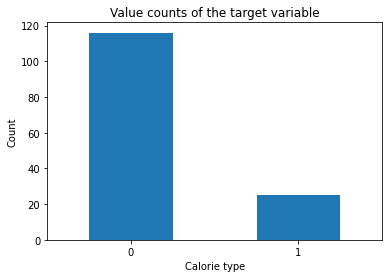

In [209]:
df.Energy.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Calorie type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

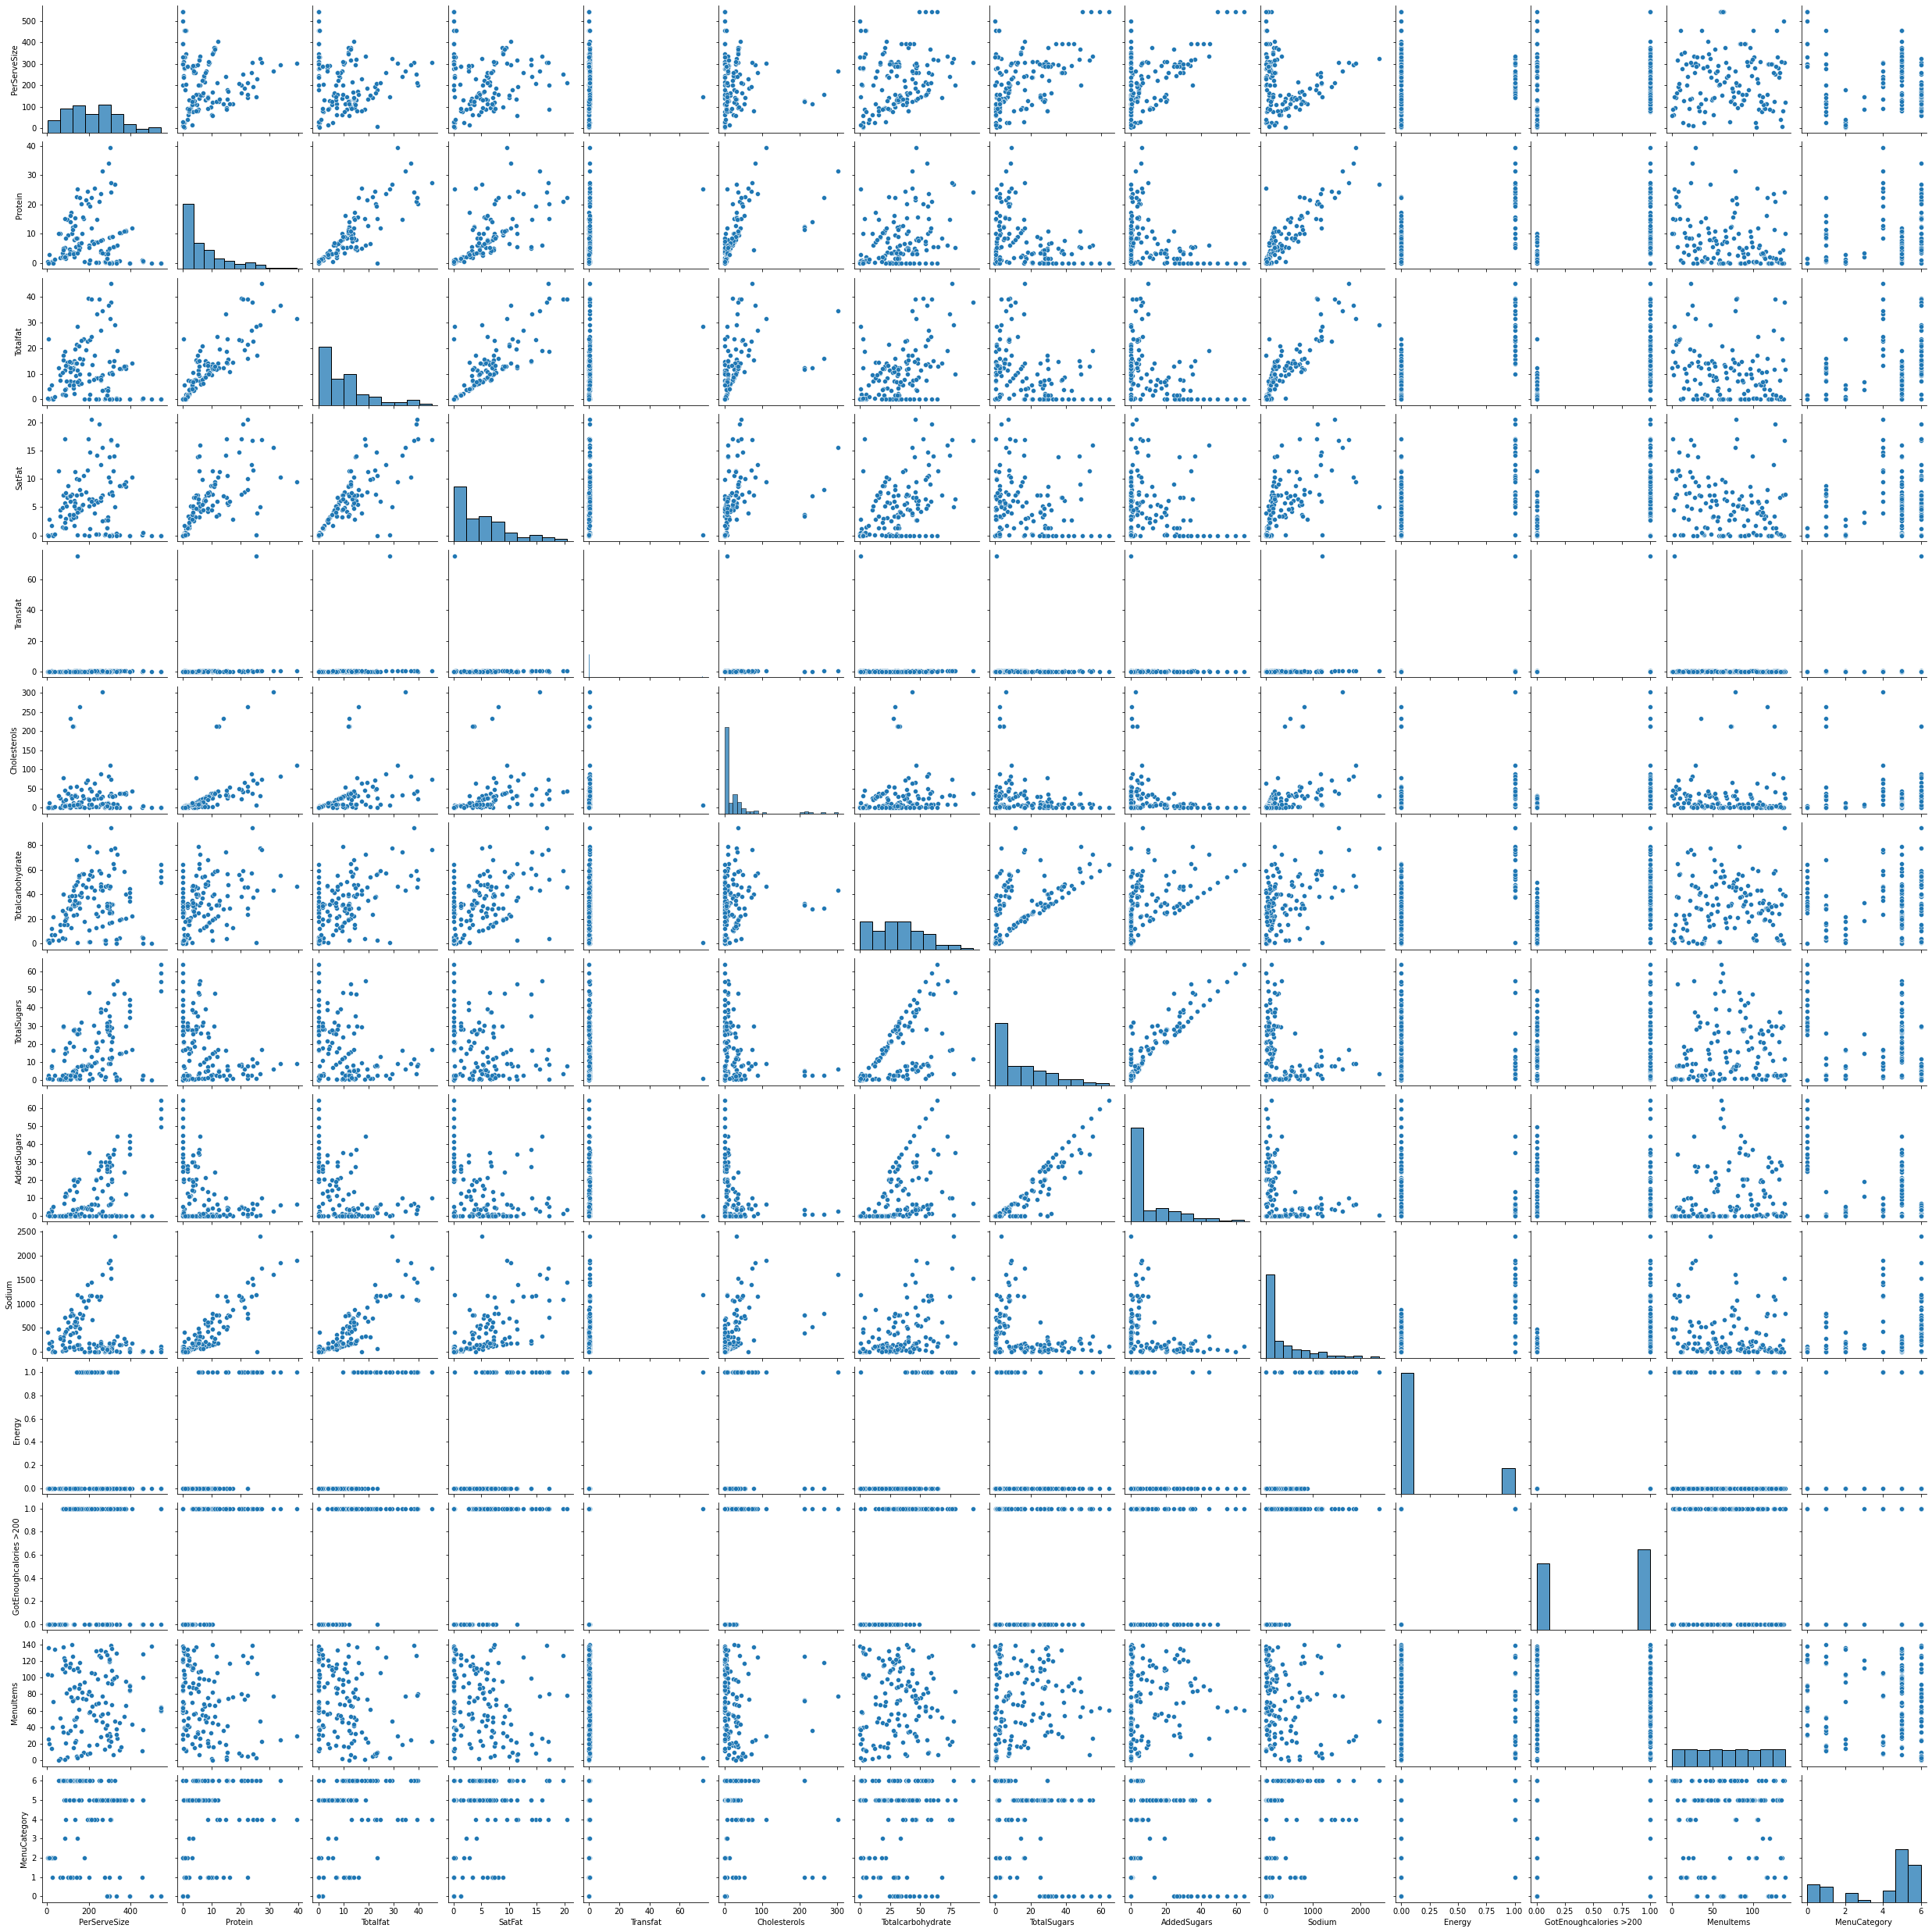

In [210]:
sns.pairplot(df)



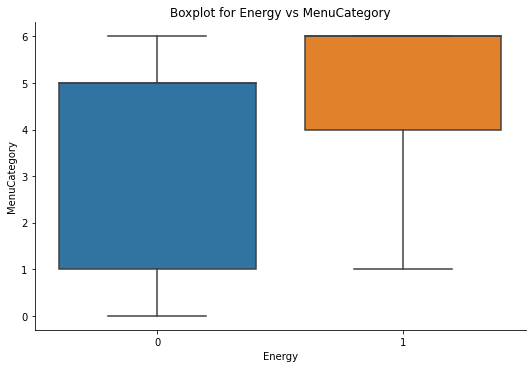

In [211]:
sns.catplot(x="Energy", y="MenuCategory", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Energy vs MenuCategory")
plt.show()

Text(0.5, 1.0, 'Total fat mark')

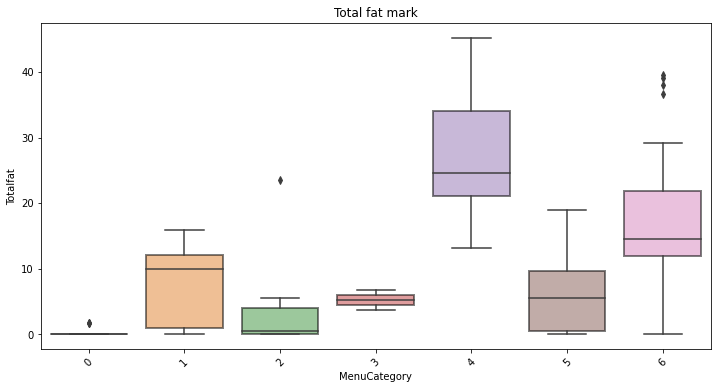

In [267]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='MenuCategory', y='Totalfat', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Total fat mark')

Text(0.5, 1.0, 'Cholesterols mark')

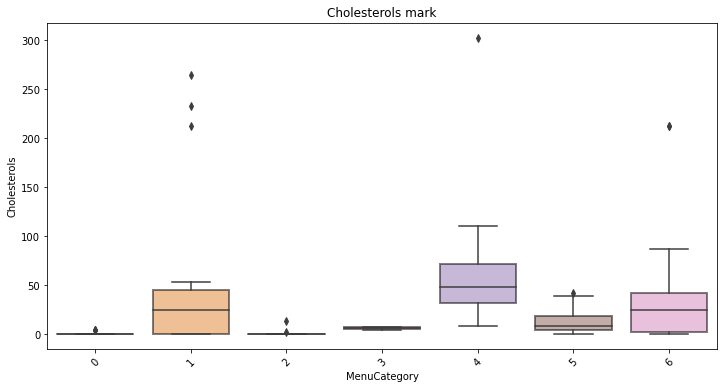

In [268]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='MenuCategory', y='Cholesterols', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Cholesterols mark')

Text(0.5, 1.0, 'Sodium mark')

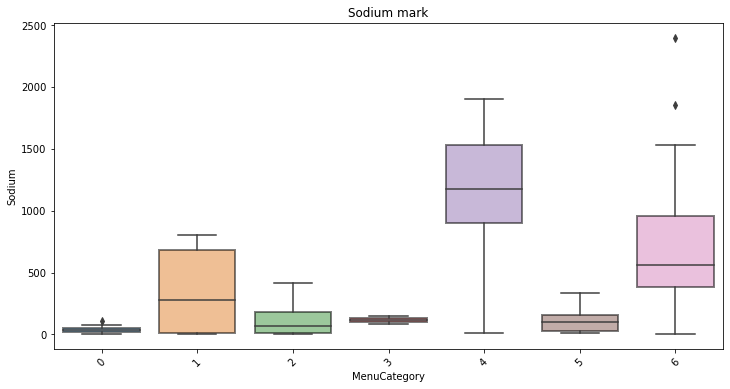

In [270]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='MenuCategory', y='Sodium', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Sodium mark')

Text(0.5, 1.0, 'Total carbohydrate mark')

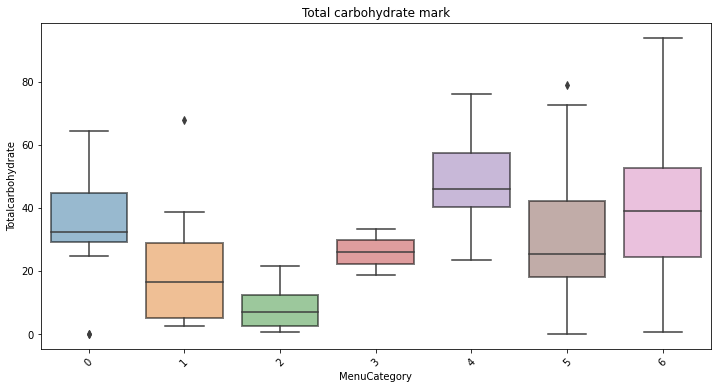

In [271]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='MenuCategory', y='Totalcarbohydrate', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Total carbohydrate mark')

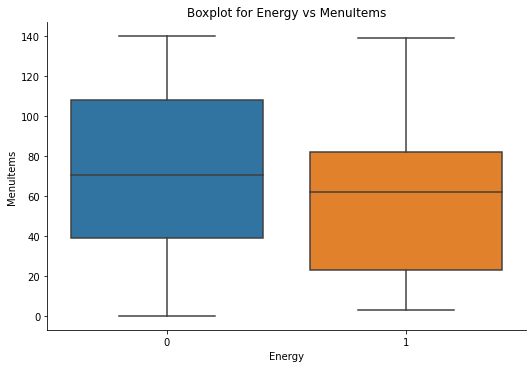

In [212]:
sns.catplot(x="Energy", y="MenuItems", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Energy vs MenuItems")
plt.show()

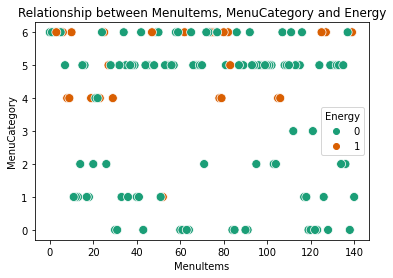

In [213]:
sns.scatterplot(x="MenuItems", y="MenuCategory", hue="Energy", data=df, palette="Dark2", s=80)
plt.title("Relationship between MenuItems, MenuCategory and Energy")
plt.show()

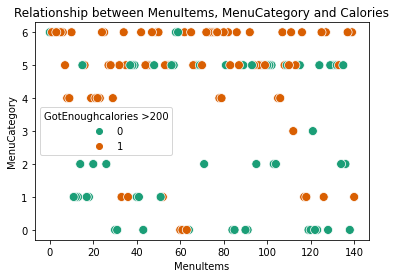

In [165]:
sns.scatterplot(x="MenuItems", y="MenuCategory", hue="GotEnoughcalories >200", data=df, palette="Dark2", s=80)
plt.title("Relationship between MenuItems, MenuCategory and Calories")
plt.show()

In [22]:
# Identifying Significant correlations

df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,PerServeSize,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200,MenuItems,MenuCategory
0,168.0,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1,1,82,6
1,146.0,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,0,1,76,6
2,199.0,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1,1,80,6
3,250.0,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1,1,127,6
4,177.0,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1,1,10,6


In [23]:
df_corr = df_num.corr(method = "pearson")
df_corr

,PerServeSize,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200,MenuItems,MenuCategory
PerServeSize,1.000000,-0.090593,-0.143030,-0.078239,-0.048114,-0.111201,0.193484,0.468581,0.508304,-0.117790,0.013278,-0.078736,0.025319,-0.223279
Protein,-0.090593,1.000000,0.875594,0.702715,0.189194,0.590031,0.415217,-0.282875,-0.319231,0.885886,0.704694,0.616766,-0.245434,0.340268
Totalfat,-0.143030,0.875594,1.000000,0.843381,0.158400,0.424339,0.538478,-0.220125,-0.280462,0.867832,0.754130,0.647490,-0.192187,0.395323
SatFat,-0.078239,0.702715,0.843381,1.000000,-0.076431,0.363135,0.525837,-0.050434,-0.174230,0.637322,0.553470,0.631835,-0.236844,0.391477
Transfat,-0.048114,0.189194,0.158400,-0.076431,1.000000,-0.029681,-0.123237,-0.082297,-0.067124,0.154248,0.186268,0.082163,-0.140259,0.089984
Cholesterols,-0.111201,0.590031,0.424339,0.363135,-0.029681,1.000000,0.142834,-0.205699,-0.225601,0.469251,0.230822,0.372461,-0.028928,0.044016
Totalcarbohydrate,0.193484,0.415217,0.538478,0.525837,-0.123237,0.142834,1.000000,0.508707,0.455049,0.494338,0.559128,0.652394,0.031644,0.154864
TotalSugars,0.468581,-0.282875,-0.220125,-0.050434,-0.082297,-0.205699,0.508707,1.000000,0.912168,-0.296311,-0.106388,0.082415,0.096794,-0.220380
AddedSugars,0.508304,-0.319231,-0.280462,-0.174230,-0.067124,-0.225601,0.455049,0.912168,1.000000,-0.270935,-0.089495,-0.024346,0.132430,-0.350637
Sodium,-0.117790,0.885886,0.867832,0.637322,0.154248,0.469251,0.494338,-0.296311,-0.270935,1.000000,0.747419,0.561506,-0.192483,0.271877


In [24]:
df_corr1 = df_num.corr(method = "spearman")
df_corr1

,PerServeSize,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200,MenuItems,MenuCategory
PerServeSize,1.000000,-0.183793,-0.247729,-0.123861,0.213260,-0.143665,0.197831,0.386853,0.292930,-0.270930,0.058402,-0.078402,0.018502,-0.232878
Protein,-0.183793,1.000000,0.916989,0.858917,0.589554,0.895461,0.391448,-0.175957,-0.226605,0.843253,0.571167,0.712219,-0.286402,0.471864
Totalfat,-0.247729,0.916989,1.000000,0.880217,0.542384,0.783367,0.453833,-0.159165,-0.193260,0.870952,0.620256,0.725713,-0.231910,0.512608
SatFat,-0.123861,0.858917,0.880217,1.000000,0.599884,0.814729,0.453073,-0.018976,-0.143107,0.771604,0.474984,0.675837,-0.269099,0.435657
Transfat,0.213260,0.589554,0.542384,0.599884,1.000000,0.588475,0.161037,-0.053215,-0.225531,0.402085,0.340548,0.372502,-0.115564,0.367848
Cholesterols,-0.143665,0.895461,0.783367,0.814729,0.588475,1.000000,0.273033,-0.047056,-0.175898,0.683869,0.399501,0.581233,-0.246341,0.356221
Totalcarbohydrate,0.197831,0.391448,0.453833,0.453073,0.161037,0.273033,1.000000,0.559092,0.591309,0.506600,0.517825,0.671098,0.040118,0.144627
TotalSugars,0.386853,-0.175957,-0.159165,-0.018976,-0.053215,-0.047056,0.559092,1.000000,0.842838,-0.139676,-0.025778,0.087148,0.163498,-0.236242
AddedSugars,0.292930,-0.226605,-0.193260,-0.143107,-0.225531,-0.175898,0.591309,0.842838,1.000000,-0.085437,0.089147,0.053923,0.208750,-0.276379
Sodium,-0.270930,0.843253,0.870952,0.771604,0.402085,0.683869,0.506600,-0.139676,-0.085437,1.000000,0.562988,0.730766,-0.217730,0.415910


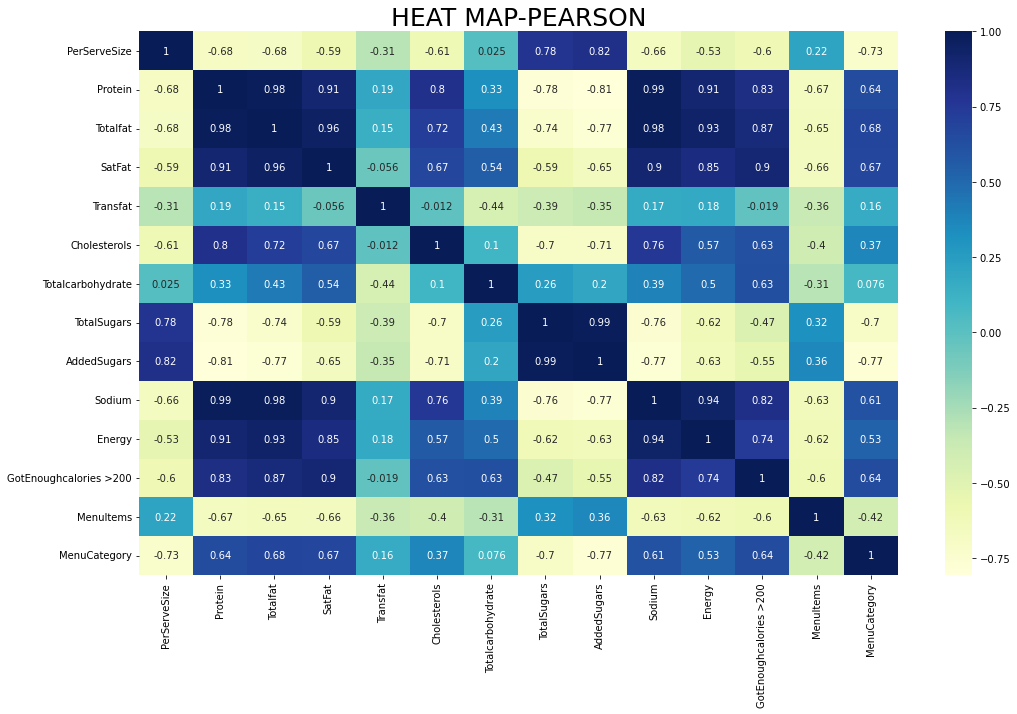

In [25]:
#Plotting	Heatmap	for	correlations

# heatmap in pearson method
heat_map1 = sns.heatmap(df_corr.corr(method="pearson"), annot=True, cmap="YlGnBu")
plt.title("HEAT MAP-PEARSON", fontsize=25, color="black")
plt.gcf().set_size_inches(17, 10)

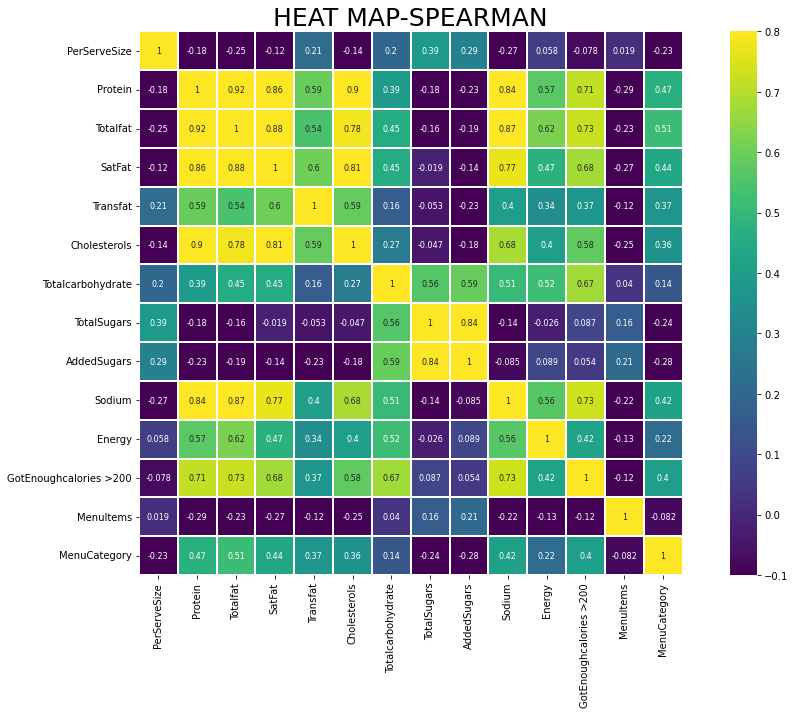

In [26]:
# heatmap in spearman method
heat_map2 = sns.heatmap(df.corr(method="spearman"), annot=True, cmap= 'viridis', linewidth = 0.1, square = True, 
                       annot_kws = {"size":8}, vmax = 0.8, vmin = -0.1)
plt.title("HEAT MAP-SPEARMAN", fontsize=25, color="black")
plt.gcf().set_size_inches(17, 10)

In [27]:
Correlation = df.corr().where(np.triu(np.ones(df.corr().shape), k=1).astype(bool))
Correlation

,PerServeSize,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200,MenuItems,MenuCategory
PerServeSize,NaN,-0.090593,-0.143030,-0.078239,-0.048114,-0.111201,0.193484,0.468581,0.508304,-0.117790,0.013278,-0.078736,0.025319,-0.223279
Protein,NaN,NaN,0.875594,0.702715,0.189194,0.590031,0.415217,-0.282875,-0.319231,0.885886,0.704694,0.616766,-0.245434,0.340268
Totalfat,NaN,NaN,NaN,0.843381,0.158400,0.424339,0.538478,-0.220125,-0.280462,0.867832,0.754130,0.647490,-0.192187,0.395323
SatFat,NaN,NaN,NaN,NaN,-0.076431,0.363135,0.525837,-0.050434,-0.174230,0.637322,0.553470,0.631835,-0.236844,0.391477
Transfat,NaN,NaN,NaN,NaN,NaN,-0.029681,-0.123237,-0.082297,-0.067124,0.154248,0.186268,0.082163,-0.140259,0.089984
Cholesterols,NaN,NaN,NaN,NaN,NaN,NaN,0.142834,-0.205699,-0.225601,0.469251,0.230822,0.372461,-0.028928,0.044016
Totalcarbohydrate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508707,0.455049,0.494338,0.559128,0.652394,0.031644,0.154864
TotalSugars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.912168,-0.296311,-0.106388,0.082415,0.096794,-0.220380
AddedSugars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.270935,-0.089495,-0.024346,0.132430,-0.350637
Sodium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.747419,0.561506,-0.192483,0.271877


In [28]:
values = [column for column in Correlation.columns if any(Correlation[column] > 0.88)]
print(values)

['AddedSugars', 'Sodium']


In [29]:
df = df.drop(columns={'AddedSugars','Sodium'})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PerServeSize            141 non-null    float64
 1   Protein                 141 non-null    float64
 2   Totalfat                141 non-null    float64
 3   SatFat                  141 non-null    float64
 4   Transfat                141 non-null    float64
 5   Cholesterols            141 non-null    float64
 6   Totalcarbohydrate       141 non-null    float64
 7   TotalSugars             141 non-null    float64
 8   Energy                  141 non-null    int64  
 9   GotEnoughcalories >200  141 non-null    int64  
 10  MenuItems               141 non-null    int64  
 11  MenuCategory            141 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 13.3 KB


# 2.2. Wrapper methods

Choose one of the wrapper methods to conduct variable selection. Report your findings.

In [48]:
#Read in data
df2 =pd.read_csv('India_Menu_latest.csv')

df2.head()

,MenuCategory,PerServeSize,MenuItems,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200
0,Regular Menu,168.0,McVeggie™ Burger,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1,Excess
1,Regular Menu,146.0,McAloo Tikki Burger®,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,0,Excess
2,Regular Menu,199.0,McSpicy™ Paneer Burger,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1,Excess
3,Regular Menu,250.0,Spicy Paneer Wrap,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1,Excess
4,Regular Menu,177.0,American Veg Burger,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1,Excess


In [49]:
# Let's see the type of each column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MenuCategory            141 non-null    object 
 1   PerServeSize            141 non-null    float64
 2   MenuItems               141 non-null    object 
 3   Protein                 141 non-null    float64
 4   Totalfat                141 non-null    float64
 5   SatFat                  141 non-null    float64
 6   Transfat                141 non-null    float64
 7   Cholesterols            141 non-null    float64
 8   Totalcarbohydrate       141 non-null    float64
 9   TotalSugars             141 non-null    float64
 10  AddedSugars             141 non-null    float64
 11  Sodium                  140 non-null    float64
 12  Energy                  141 non-null    int64  
 13  GotEnoughcalories >200  141 non-null    object 
dtypes: float64(10), int64(1), object(3)
memory

In [50]:
#replacing gas as "0" and disel as"1"
df2.loc[ df2['GotEnoughcalories >200'] == "Excess",'GotEnoughcalories >200'] = "1"
df2.loc[ df2['GotEnoughcalories >200'] == "Shortage", 'GotEnoughcalories >200'] = "0"
df2.dropna()
df2.head()

,MenuCategory,PerServeSize,MenuItems,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200
0,Regular Menu,168.0,McVeggie™ Burger,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1,1
1,Regular Menu,146.0,McAloo Tikki Burger®,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,0,1
2,Regular Menu,199.0,McSpicy™ Paneer Burger,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1,1
3,Regular Menu,250.0,Spicy Paneer Wrap,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1,1
4,Regular Menu,177.0,American Veg Burger,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1,1


In [51]:
#info coverting to numeric
df2['GotEnoughcalories >200']=pd.to_numeric(df2['GotEnoughcalories >200'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MenuCategory            141 non-null    object 
 1   PerServeSize            141 non-null    float64
 2   MenuItems               141 non-null    object 
 3   Protein                 141 non-null    float64
 4   Totalfat                141 non-null    float64
 5   SatFat                  141 non-null    float64
 6   Transfat                141 non-null    float64
 7   Cholesterols            141 non-null    float64
 8   Totalcarbohydrate       141 non-null    float64
 9   TotalSugars             141 non-null    float64
 10  AddedSugars             141 non-null    float64
 11  Sodium                  140 non-null    float64
 12  Energy                  141 non-null    int64  
 13  GotEnoughcalories >200  141 non-null    int64  
dtypes: float64(10), int64(2), object(2)
memory

In [52]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
label1 = le.fit_transform(df2['MenuCategory'])
 
# printing label
label1

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
df2.drop('MenuCategory', axis=1, inplace=True)
 
# Appending the array to our dataFrame
df2['MenuCategory'] = label1
# printing Dataframe
df2

,PerServeSize,MenuItems,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200,MenuCategory
0,168.0,McVeggie™ Burger,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1,1,6
1,146.0,McAloo Tikki Burger®,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,0,1,6
2,199.0,McSpicy™ Paneer Burger,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1,1,6
3,250.0,Spicy Paneer Wrap,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1,1,6
4,177.0,American Veg Burger,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,8.0,Tomato Ketchup Sachets,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05,0,0,2
137,30.0,Maple Syrup,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00,0,0,2
138,14.0,Cheese Slice,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95,0,0,2
139,40.0,Sweet Corn,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04,0,0,2


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PerServeSize            141 non-null    float64
 1   MenuItems               141 non-null    object 
 2   Protein                 141 non-null    float64
 3   Totalfat                141 non-null    float64
 4   SatFat                  141 non-null    float64
 5   Transfat                141 non-null    float64
 6   Cholesterols            141 non-null    float64
 7   Totalcarbohydrate       141 non-null    float64
 8   TotalSugars             141 non-null    float64
 9   AddedSugars             141 non-null    float64
 10  Sodium                  140 non-null    float64
 11  Energy                  141 non-null    int64  
 12  GotEnoughcalories >200  141 non-null    int64  
 13  MenuCategory            141 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory

In [56]:
from sklearn.preprocessing import LabelEncoder
seclab = LabelEncoder()
secondlabel = seclab.fit_transform(df2['MenuItems'])
 
# printing label
secondlabel

array([ 82,  76,  80, 127,  10, 139,  49, 107,  75,  42,  74, 125,  25,
         6,  24,  50,  73,  72,  47,  77,   2,   4,   5,   0,   1,   3,
       111,  86,  62, 116,  92,  65,  58,  59,  34, 137, 140,  33, 126,
       117, 118,  36,  52,  51,  40,  41,  13,  12,  11,  18,  17,  16,
        68,  67,  66,  46,  45,  44,  98,  97,  96,  15,  55,  54,  53,
       108,  35,  39,  38,  37, 102, 101, 100, 131, 130, 129,  69, 132,
        48,  57,  32,  99,  27, 133,  28,  70,  94, 109,  93, 135,  56,
         7, 124,  81, 114,  88, 115,  89, 113,  87, 110,  83, 121, 112,
         8,   9,  19,  23,  29,  78,  79, 105, 106,  21,  22, 119,  84,
        60, 120,  85,  61, 123,  91,  64, 122,  90,  63,  30,  43, 128,
        31, 138, 103,  14,  26, 104, 136,  71,  20, 134,  95])

In [57]:
df2.drop("MenuItems", axis=1, inplace=True)
 
# Appending the array to our dataFrame
df2["MenuItems"] = secondlabel
# printing Dataframe
df2

,PerServeSize,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200,MenuCategory,MenuItems
0,168.0,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1,1,6,82
1,146.0,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,0,1,6,76
2,199.0,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1,1,6,80
3,250.0,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1,1,6,127
4,177.0,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1,1,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,8.0,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05,0,0,2,136
137,30.0,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00,0,0,2,71
138,14.0,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95,0,0,2,20
139,40.0,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04,0,0,2,134


In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PerServeSize            141 non-null    float64
 1   Protein                 141 non-null    float64
 2   Totalfat                141 non-null    float64
 3   SatFat                  141 non-null    float64
 4   Transfat                141 non-null    float64
 5   Cholesterols            141 non-null    float64
 6   Totalcarbohydrate       141 non-null    float64
 7   TotalSugars             141 non-null    float64
 8   AddedSugars             141 non-null    float64
 9   Sodium                  140 non-null    float64
 10  Energy                  141 non-null    int64  
 11  GotEnoughcalories >200  141 non-null    int64  
 12  MenuCategory            141 non-null    int64  
 13  MenuItems               141 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 15.

In [59]:
df2.isnull().sum()

PerServeSize              0
Protein                   0
Totalfat                  0
SatFat                    0
Transfat                  0
Cholesterols              0
Totalcarbohydrate         0
TotalSugars               0
AddedSugars               0
Sodium                    1
Energy                    0
GotEnoughcalories >200    0
MenuCategory              0
MenuItems                 0
dtype: int64

In [60]:
## Missing values for Numerical Columns
df2.select_dtypes(include=['int64','float']).isnull().sum()[df2.select_dtypes(include=['int64','float']).isnull()
                                                       .sum()>0]

Sodium    1
dtype: int64

In [215]:
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.fillna(9,inplace=True)

In [216]:
explanatory= df2[['PerServeSize','Protein','Totalfat','MenuItems','MenuCategory','GotEnoughcalories >200','SatFat','Transfat','Cholesterols','Totalcarbohydrate','TotalSugars','AddedSugars','Sodium']]
response= df2['Energy']


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(explanatory, response, test_size=0.30, random_state=22 )

from sklearn.linear_model import LinearRegression

regression=linear_model.LinearRegression()
regression.fit(X_train,Y_train)


c = sm.add_constant(X_train)
model = sm.OLS(Y_train,c).fit()

model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     19.32
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           5.38e-20
Time:                        18:04:16   Log-Likelihood:                 21.738
No. Observations:                  98   AIC:                            -15.48
Df Residuals:                      84   BIC:                             20.71
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2005      0.083     -2.406      0.018      -0.366      -0.035
PerServeSize               0.0003      0.000      1.582      0.118   -8.32e-05       0.001
Protein                    0.0155      0.007      2.135      0.036       0.001       0.030
Totalfat                   0.0132      0.007      1.770      0.080      -0.002       0.028
MenuItems               6.586e-05      0.001      0.117      0.907      -0.001       0.001
MenuCategory              -0.0052      0.014     -0.384      0.702      -0.032       0.022
GotEnoughcalories >200    -0.2495      0.072     -3.460      0.001      -0.393      -0.106
SatFat                 -2.272e-05      0.009     -0.002      0.998      -0.019       0.019
Transfat                   0.0092      0.004      2.486      0.015       0.002       0.017
Cholesterols              -0.0009      0.001     -1.549      0.125      -0.002       0.000
Totalcarbohydrate          0.0113      0.003      4.481      0.000       0.006       0.016
TotalSugars               -0.0097      0.004     -2.339      0.022      -0.018      -0.001
AddedSugars                0.0025      0.004      0.570      0.570      -0.006       0.011
Sodium                 -2.247e-05      0.000     -0.190      0.850      -0.000       0.000
==============================================================================
Omnibus:                       14.421   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.005
Skew:                           0.725   Prob(JB):                     7.47e-05
Kurtosis:                       4.598   Cond. No.                     2.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [217]:
#print('accuracy:  \n', score)
print('Coefficients: \n', regression.coef_)
print('intercept: \n',regression.intercept_)

y_pred = regression.predict(X_test)

Coefficients: 
 [ 3.23122257e-04  1.54673328e-02  1.32279659e-02  6.58635567e-05
 -5.21504833e-03 -2.49507828e-01 -2.27223823e-05  9.22162248e-03
 -8.72496956e-04  1.12732370e-02 -9.71344225e-03  2.47570697e-03
 -2.24702412e-05]
intercept: 
 -0.20051046742596698


In [218]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Deviation:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))





Mean Absolute Error: 0.15270503535964905
Mean Squared Error: 0.04932280820712026
Root Mean Squared Deviation: 0.22208738867193756


In [219]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [220]:
Seq = SFS(LinearRegression(),
          k_features=7,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
Seq.fit(X_train, Y_train)
Seq.k_feature_names_

('PerServeSize',
 'Totalfat',
 'GotEnoughcalories >200',
 'SatFat',
 'Cholesterols',
 'Totalcarbohydrate',
 'Sodium')

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


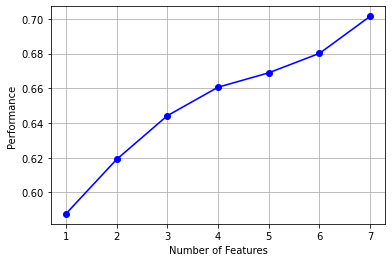

In [221]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(Seq.get_metric_dict(), kind='std_dev')
plt.grid()
plt.show()

In [222]:
explanatory= df2[['PerServeSize','Protein','Totalfat','MenuItems','MenuCategory','GotEnoughcalories >200','SatFat','Transfat','Cholesterols','Totalcarbohydrate','TotalSugars','AddedSugars','Sodium']]
response= df2['Energy']

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import statsmodels.api as sm

In [224]:
explanatory_train, explanatory_test, response_train, response_test = train_test_split(explanatory, response, test_size=0.30, random_state=22)


In [225]:
lassoAlgo = Lasso(alpha = 1)
lassoAlgo.fit(explanatory_train, response_train)
response_pred1 = lassoAlgo.predict(explanatory_test)
 

mse = np.mean((response_pred1 - response_test)**2)
print("MSE on test set", mse)
lassoAlgo_cof1 = pd.DataFrame()
lassoAlgo_cof1["Columns"] = explanatory_train.columns
lassoAlgo_cof1['Coefficient Estimate'] = pd.Series(lassoAlgo.coef_)

MSE on test set 0.05829360691102883


In [226]:
print(lassoAlgo_cof1)

                   Columns  Coefficient Estimate
0             PerServeSize              0.000251
1                  Protein              0.000000
2                 Totalfat              0.000000
3                MenuItems              0.000000
4             MenuCategory              0.000000
5   GotEnoughcalories >200              0.000000
6                   SatFat              0.000000
7                 Transfat              0.000000
8             Cholesterols             -0.000467
9        Totalcarbohydrate              0.000645
10             TotalSugars              0.000000
11             AddedSugars              0.000000
12                  Sodium              0.000606


In [227]:
print(response_pred1)

[ 2.03742551e-02  6.72162931e-02 -2.33253698e-04  2.50468928e-01
 -2.89393322e-03 -2.86463795e-03  2.18711899e-02 -2.91487104e-02
 -1.50989873e-02  7.77148316e-01 -2.92856074e-02 -2.90820199e-02
  4.51533456e-02  1.04073773e+00 -3.67089606e-03  4.99358982e-01
 -7.86825862e-02  4.21813804e-01  2.91797317e-02 -2.98772518e-02
  1.01112476e-01  3.80938845e-02 -6.57943918e-02  6.15828332e-01
  1.01832413e-01  3.62910900e-01 -6.75893839e-04  6.56563965e-03
  3.30545128e-01  4.03292988e-02  3.88757748e-01  6.87863529e-01
  2.01666706e-02  5.47487029e-02  1.79496854e-02  1.04741843e-01
 -2.63196031e-02  2.83272239e-02  3.03790334e-01  2.07861267e-02
  1.69169625e-01 -2.96286780e-02  8.36145469e-02]


In [228]:

from sklearn.linear_model import Ridge, RidgeCV, Lasso

#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(explanatory_train,response_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(explanatory_train, response_train)
test_score_ridge = ridgeReg.score(explanatory_test, response_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.7388896276827499
The test score for ridge model is 0.6249430404812124


# 1. Therefore, Embedded methods i.e., Lasso and Ridge regression did not provide any information instead the scores produced are also less.
# 2. Wrapper Method implemented to determine the variables using sequential feature selection, but the scores determined are very less as per the regression model executed using OLS model.
# 3. Hence, Filter Method is considered with the Correlation determined using Heat Map, and clearly two variables are shown i.e., "Added Sugars" & "Sodium".


# 3.1 : Define your X and y: your dependent variable is Energy, the rest of the variables are your independent variables

In [229]:
df2.head()

,PerServeSize,Protein,Totalfat,SatFat,Transfat,Cholesterols,Totalcarbohydrate,TotalSugars,AddedSugars,Sodium,Energy,GotEnoughcalories >200,MenuCategory,MenuItems
0,168.0,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1,1,6,82
1,146.0,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,0,1,6,76
2,199.0,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1,1,6,80
3,250.0,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1,1,6,127
4,177.0,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1,1,6,10


In [230]:
#your code
#declaring the fuel_type
x= df2.drop(['Energy'], axis=1)
y= df2['Energy']

In [231]:
df2 = df2.dropna(how ='any')

In [232]:
df2.isnull().sum()

PerServeSize              0
Protein                   0
Totalfat                  0
SatFat                    0
Transfat                  0
Cholesterols              0
Totalcarbohydrate         0
TotalSugars               0
AddedSugars               0
Sodium                    0
Energy                    0
GotEnoughcalories >200    0
MenuCategory              0
MenuItems                 0
dtype: int64

# Splitting the dataset into X and Y and determining the Classification Model

In [233]:
#your code
#dividing the data into training and test set test_size 
x_trainf, x_testf, y_trainf, y_testf = train_test_split(x, y, test_size = 0.3,random_state=746)

In [234]:
#your code
#assigning the train and test
x_train=x_trainf
x_test=x_testf
y_train=y_trainf
y_test=y_testf

In [235]:
#to Fit Logistic Regression to the training set  for Area Under the Curve
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(max_iter=420)  
classifier.fit(x_train, y_train)  

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=420)

In [236]:
#to predict the test result  
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

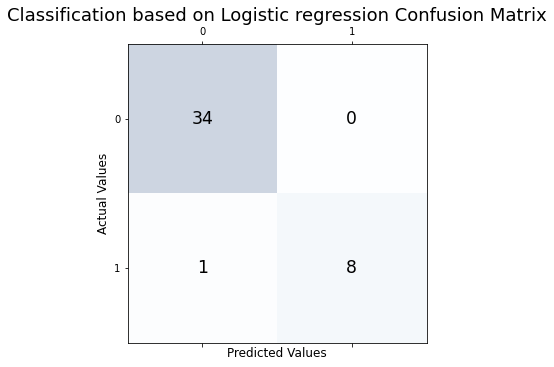

In [237]:
#to Create the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  

#test set result is visuvalized  
fig, ax = plt.subplots(figsize=(5.5, 5.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.2)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.title('Classification based on Logistic regression Confusion Matrix', fontsize=18)
#plot the table data
plt.show()

In [238]:
#to get the classification report & accuracy for receiver operating characteristic curve
accuracy =accuracy_score(y_test, classifier.predict(x_test))
roc_value=roc_auc_score(y_test, classifier.predict(x_test))
analysis=classification_report(y_test, classifier.predict(x_test))
print("Accuracy= ",accuracy)
print("roc= ",roc_value)
print("classification report= \n",analysis)

Accuracy=  0.9767441860465116
roc=  0.9444444444444444
classification report= 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.89      0.94         9

    accuracy                           0.98        43
   macro avg       0.99      0.94      0.96        43
weighted avg       0.98      0.98      0.98        43



In [239]:
# AUC Curve
# Model for Test data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AUC: 0.485


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


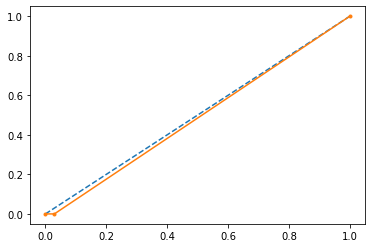

In [242]:
probs_test = classifier.predict(X_test)
auc_test = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test)
plt.plot([0,1],[0,1], linestyle = '--')
#Plot the Roc Curve for the model
plt.plot(fpr_test, tpr_test, marker = '.')
# show the plot
plt.show()

# 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC

In [243]:
#your code
#using naive bayes to classify the data
from sklearn.naive_bayes import GaussianNB
x_train1=x_trainf
x_test1=x_testf
y_train1=y_trainf
y_test1=y_testf
# import GaussianNB from sklearn
naive_bayes = GaussianNB()
naive_bayes.fit(x_train1, y_train1)
 
# test set predictions
y_pred1 = naive_bayes.predict(x_test1)
y_pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

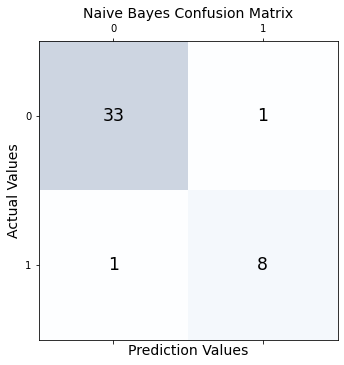

In [244]:
#To create Confusion matrix   
from sklearn.metrics import confusion_matrix  
confusionMatrix= confusion_matrix(y_test1 ,y_pred1)  

#test set data visuvalized 
fig, ax = plt.subplots(figsize=(5.5, 5.5))
ax.matshow(confusionMatrix, cmap=plt.cm.Blues, alpha=0.2)
for i in range(confusionMatrix.shape[0]):
    for j in range(confusionMatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionMatrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Prediction Values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14)
#Naive Bayes Confusion Matrix result
plt.title('Naive Bayes Confusion Matrix', fontsize=14)
plt.show()

In [245]:
#classification report  for receiver operating characteristic curve
naivebayes_accuracy=accuracy_score(y_test1, naive_bayes.predict(x_test1))
naivebayes_roc=roc_auc_score(y_test1, naive_bayes.predict(x_test1))
naivebayes_analysis=classification_report(y_test1, naive_bayes.predict(x_test1))
print("Naive Bayes Accuracy= ",naivebayes_accuracy)
print("Naive Bayes roc= ",naivebayes_roc)
print("Naive Bayes classification report= \n",naivebayes_analysis)

Naive Bayes Accuracy=  0.9534883720930233
Naive Bayes roc=  0.9297385620915032
Naive Bayes classification report= 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.89      0.89      0.89         9

    accuracy                           0.95        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.95      0.95      0.95        43



In [246]:
# AUC Curve
# Model for Test data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AUC: 0.930


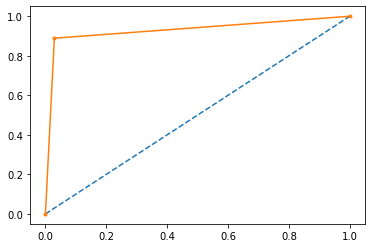

In [247]:
auc_test = roc_auc_score(y_test1, naive_bayes.predict(x_test1))
print('AUC: %.3f' % auc_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test1, naive_bayes.predict(x_test1))
plt.plot([0,1],[0,1], linestyle = '--')
#Plot the Roc Curve for the model
plt.plot(fpr_test, tpr_test, marker = '.')
# show the plot
plt.show()

# 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC¶

In [142]:
#your code
#by using KNN TO classify the data 
x_train2=x_trainf
x_test2=x_testf
y_train2=y_trainf
y_test2=y_testf


In [143]:
#Area Under the Curve
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train2, y_train2)

y_pred2 = classifier.predict(x_test2)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

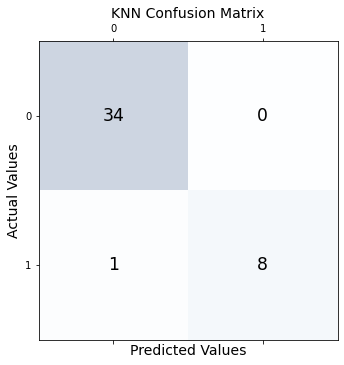

In [144]:
#to create Confusion matrix  
from sklearn.metrics import confusion_matrix  
KNClasi_Confusion_Matrix= confusion_matrix(y_test2,y_pred2)  

#Visualize the test set result  
fig, ax = plt.subplots(figsize=(5.5, 5.5))
ax.matshow(KNClasi_Confusion_Matrix, cmap=plt.cm.Blues, alpha=0.2)
for i in range(KNClasi_Confusion_Matrix.shape[0]):
    for j in range(KNClasi_Confusion_Matrix.shape[1]):
        ax.text(x=j, y=i,s=KNClasi_Confusion_Matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14)
plt.title('KNN Confusion Matrix', fontsize=14)
plt.show()

In [248]:
#classification report for Area Under the Curve
scores=accuracy_score(y_test2, knn.predict(x_test2))
roc_values=roc_auc_score(y_test2, knn.predict(x_test2))
final_report=classification_report(y_test2, knn.predict(x_test2),zero_division=0)
print("Accuracy= ",scores)
print("roc= ",roc_values)
print("classification report= \n",final_report)

Accuracy=  0.9767441860465116
roc=  0.9444444444444444
classification report= 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.89      0.94         9

    accuracy                           0.98        43
   macro avg       0.99      0.94      0.96        43
weighted avg       0.98      0.98      0.98        43



In [249]:
# AUC Curve
# Model for Test data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AUC: 0.944


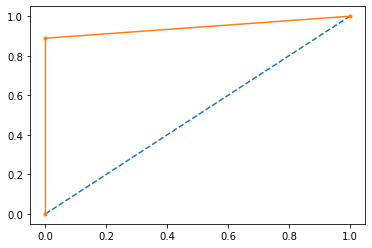

In [252]:
auc_test = roc_auc_score(y_test2, knn.predict(x_test2))
print('AUC: %.3f' % auc_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test2, knn.predict(x_test2))
plt.plot([0,1],[0,1], linestyle = '--')
#Plot the Roc Curve for the model
plt.plot(fpr_test, tpr_test, marker = '.')
# show the plot
plt.show()

# 3.4 Choose one: SVM or Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC

In [253]:
#your code
#support vector machine to classify the data 
x_train3=x_trainf
x_test3=x_testf
y_train3=y_trainf
y_test3=y_testf

In [254]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(x_train3,y_train3)
y_pred3=svc.predict(x_test3)
y_pred3

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

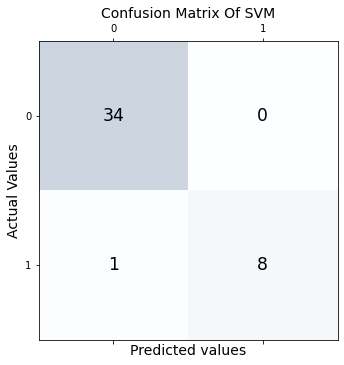

In [255]:
#To create  Confusion matrix  
from sklearn.metrics import confusion_matrix  
svm_cm= confusion_matrix(y_test3,y_pred3)  

#Visualize the test set result  
fig, ax = plt.subplots(figsize=(5.5, 5.5))
ax.matshow(svm_cm, cmap=plt.cm.Blues, alpha=0.2)
for i in range(svm_cm.shape[0]):
    for j in range(svm_cm.shape[1]):
        ax.text(x=j, y=i,s=svm_cm[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14)
plt.title('Confusion Matrix Of SVM', fontsize=14)
#plot show
plt.show()

In [256]:
#classification report using svm
svc_score=accuracy_score(y_test3, svc.predict(x_test3))
svc_roc=roc_auc_score(y_test3, svc.predict(x_test3))
svc_report=classification_report(y_test3, svc.predict(x_test3),zero_division=0)
print("Accuracy= ",svc_score)
print("roc= ",svc_roc)
print("classification report= \n",svc_report)

Accuracy=  0.9767441860465116
roc=  0.9444444444444444
classification report= 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.89      0.94         9

    accuracy                           0.98        43
   macro avg       0.99      0.94      0.96        43
weighted avg       0.98      0.98      0.98        43



In [257]:
# AUC Curve
# Model for Test data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AUC: 0.944


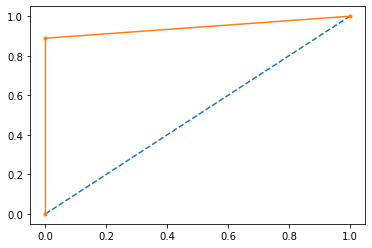

In [258]:
auc_test = roc_auc_score(y_test3, svc.predict(x_test3))
print('AUC: %.3f' % auc_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test3, svc.predict(x_test3))
plt.plot([0,1],[0,1], linestyle = '--')
#Plot the Roc Curve for the model
plt.plot(fpr_test, tpr_test, marker = '.')
# show the plot
plt.show()

# 3.5 Compare your results and comment on your findings. Which one(s) did the best job? What could have been the problem with the ones that did not work? etc.

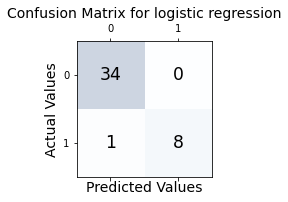

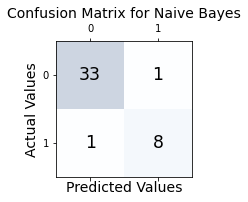

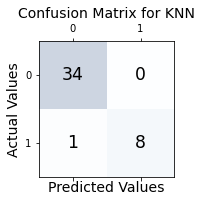

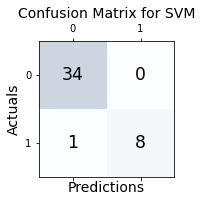

In [259]:
#your answer
#To create  the Confusion matrix  
from sklearn.metrics import confusion_matrix  
Final_Confusion_Matrix= confusion_matrix(y_test,y_pred)  

# To Visualize the test set result  
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(Final_Confusion_Matrix, cmap=plt.cm.Blues, alpha=0.2)
for i in range(Final_Confusion_Matrix.shape[0]):
    for j in range(Final_Confusion_Matrix.shape[1]):
        ax.text(x=j, y=i,s=Final_Confusion_Matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14)
plt.title('Confusion Matrix for logistic regression', fontsize=14)
plt.show()

#To Create the Confusion matrix  
from sklearn.metrics import confusion_matrix  
Final_Confusion_Matrix= confusion_matrix(y_test1 ,y_pred1)  

#To Visualize the test set result  
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(Final_Confusion_Matrix, cmap=plt.cm.Blues, alpha=0.2)
for i in range(Final_Confusion_Matrix.shape[0]):
    for j in range(Final_Confusion_Matrix.shape[1]):
        ax.text(x=j, y=i,s=Final_Confusion_Matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14)
plt.title('Confusion Matrix for Naive Bayes', fontsize=14)
plt.show()

#To Create the Confusion matrix  
from sklearn.metrics import confusion_matrix  
Final_Confusion_Matrix= confusion_matrix(y_test2,y_pred2)  

#displays the test set result  
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(Final_Confusion_Matrix, cmap=plt.cm.Blues, alpha=0.2)
for i in range(Final_Confusion_Matrix.shape[0]):
    for j in range(Final_Confusion_Matrix.shape[1]):
        ax.text(x=j, y=i,s=Final_Confusion_Matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14)
plt.title('Confusion Matrix for KNN', fontsize=14)
plt.show()

#to Create the Confusion matrix  
from sklearn.metrics import confusion_matrix  
Final_Confusion_Matrix= confusion_matrix(y_test3,y_pred3)  

#Visualize the test set result  
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(Final_Confusion_Matrix, cmap=plt.cm.Blues, alpha=0.2)
for i in range(Final_Confusion_Matrix.shape[0]):
    for j in range(Final_Confusion_Matrix.shape[1]):
        ax.text(x=j, y=i,s=Final_Confusion_Matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix for SVM', fontsize=14)
#plot show
plt.show()

In [260]:
# Logistic Regression Report
logistic_score=accuracy_score(y_test, classifier.predict(x_test))
logistic_roc=roc_auc_score(y_test, classifier.predict(x_test))
logistic_report=classification_report(y_test, classifier.predict(x_test))
print("Logistic Regression Report\n")
print("Accuracy= ",logistic_score)
print("roc= ",logistic_roc)
print("Logistic classification report= \n",logistic_report)

# Naive Bayes Classification Report
naivebayes_score=accuracy_score(y_test1, naive_bayes.predict(x_test1))
naivebayes_roc=roc_auc_score(y_test1, naive_bayes.predict(x_test1))
naivebayes_report=classification_report(y_test1, naive_bayes.predict(x_test1))
print("Naive Bayes Classification Report\n")
print("Accuracy= ",naivebayes_score)
print("roc= ",naivebayes_roc)
print("Naive Bayes classification report= \n",naivebayes_report)

# KNN Classification Report
knn_score=accuracy_score(y_test2, knn.predict(x_test2))
knn_roc=roc_auc_score(y_test2, knn.predict(x_test2))
knn_report=classification_report(y_test2, knn.predict(x_test2),zero_division=0)
print("KNN Classification Report\n")
print("Accuracy= ",knn_score)
print("roc= ",knn_roc)
print("KNN classification report= \n",knn_report)

#SVM Report
svm_score=accuracy_score(y_test3, svc.predict(x_test3))
svm_roc=roc_auc_score(y_test3, svc.predict(x_test3))
svm_report=classification_report(y_test3, svc.predict(x_test3),zero_division=0)
print("SVM Report\n")
print("Accuracy= ",svm_score)
print("roc= ",svm_roc)
print("SVM classification report= \n",svm_report)

Logistic Regression Report

Accuracy=  0.9767441860465116
roc=  0.9444444444444444
Logistic classification report= 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.89      0.94         9

    accuracy                           0.98        43
   macro avg       0.99      0.94      0.96        43
weighted avg       0.98      0.98      0.98        43

Naive Bayes Classification Report

Accuracy=  0.9534883720930233
roc=  0.9297385620915032
Naive Bayes classification report= 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.89      0.89      0.89         9

    accuracy                           0.95        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.95      0.95      0.95        43

KNN Classification Report

Accuracy=  0.9767441860465116
roc=  0.9444444444444444
KNN classification r

# Support Vector Classifier

In [261]:
#your code
x_train4=x_trainf
x_test4=x_testf
y_train4=y_trainf
y_test4=y_testf

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train4= st_x.fit_transform(x_train4)    
x_test4= st_x.transform(x_test4)  

In [262]:
#svc fit the data
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(x_train4,y_train4)

svc_pred=svc.predict(x_test4)
svc_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

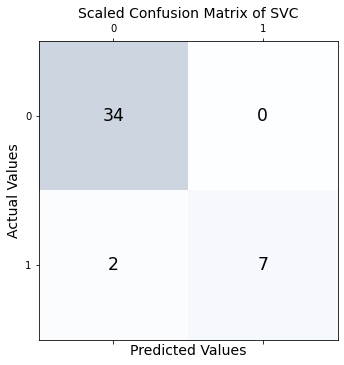

In [272]:
#To Create the Confusion matrix  
from sklearn.metrics import confusion_matrix  
svc_confusion_matrix= confusion_matrix(y_test4,svc_pred)  

#Visualize the test set result  
fig, ax = plt.subplots(figsize=(5.5, 5.5))
ax.matshow(svc_confusion_matrix, cmap=plt.cm.Blues, alpha=0.2)
for i in range(svc_confusion_matrix.shape[0]):
    for j in range(svc_confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=svc_confusion_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14)
plt.title('Scaled Confusion Matrix of SVC', fontsize=14)
#plot show
plt.show()

In [273]:
#SVM Report after scaling
svm_scaled_score=accuracy_score(y_test4, svc.predict(x_test4))
svm_scaled_roc=roc_auc_score(y_test4, svc.predict(x_test4))
svm_scaled_report=classification_report(y_test4, svc.predict(x_test4),zero_division=0)
print("SVC Report after scaling\n")
print("Accuracy= ",svm_scaled_score)
print("roc= ",svm_scaled_roc)
print("classification report= \n",svm_scaled_report)

SVC Report after scaling

Accuracy=  0.9534883720930233
roc=  0.8888888888888888
classification report= 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.78      0.88         9

    accuracy                           0.95        43
   macro avg       0.97      0.89      0.92        43
weighted avg       0.96      0.95      0.95        43



In [265]:
# AUC Curve
# Model for Test data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AUC: 0.889


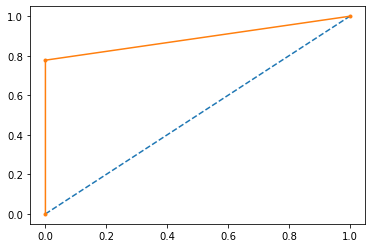

In [266]:
auc_test = roc_auc_score(y_test4, svc.predict(x_test4))
print('AUC: %.3f' % auc_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test4, svc.predict(x_test4))
plt.plot([0,1],[0,1], linestyle = '--')
#Plot the Roc Curve for the model
plt.plot(fpr_test, tpr_test, marker = '.')
# show the plot
plt.show()

# Therefore from all the models i.e., Classification using Logistic Regression, Naive Bayes, Support Vector Classifier, K-Nearest Neighbour and Support Vector Machines the algorithm with maximum ROC value and Accuracy is given by 3 Algorithms
# But the best models are KNN and SVM as per the consideration of AUC curves too.

Hence, The Null Hypothesis mentioned that atleast one order made by the customer that should be giving enough energy from the order placed is rejected.
The Model produced is Statistically Siginicant as per the pvalues produced by the OLS Regression model. 